<a href="https://colab.research.google.com/github/raghavanpartha/FirstApp/blob/main/A_Wierd_AutoEncoder_Raghavan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import tensorflow as tf
import cv2
np.random.seed(42)

In [7]:
# Importing Image and Standardizing the same
SIZE=512

#Load the original image and resize the same with 256X256
#The image is a square image(Square Matrix)
img = tf.keras.preprocessing.image.load_img('donald_duck.jpeg', target_size=(SIZE, SIZE))

#Converting the blob/image into a numpy array
img_data= tf.keras.preprocessing.image.img_to_array(img)

#Standardizing the intensities ---- 0 to 255
img_array = img_data.astype('float32') / 255.

myCompatibleImage = np.expand_dims(img_array, axis = 0)
myCompatibleImage.shape



(1, 512, 512, 3)

In [8]:
# Hinton and Salakhutdinov (2006) ---> Autoencoder
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
#Dense Layer
#=========================================Dont Get Confused 
#Dense Layer
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(3, (3, 3), activation='relu', padding='same'))


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 8)       584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 8)        0

In [10]:
#To enable Eager Execution !!!
# By default tensorflow expects batch based approach which is a lazy approach
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [11]:
# Callbacks Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)
import tensorflow as tf
class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
#    testScore = logs['val_accuracy']
    Score = logs['accuracy']
    #epoch=logs['']

    if Score >= self.cl and epoch > 100:
      self.model.stop_training=True

In [12]:
model.fit(myCompatibleImage, myCompatibleImage, epochs=10000, shuffle=True,callbacks=[MyQualityThreshold(0.4)])

Epoch 1/10000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 12s 12s/step - loss: 0.7665 - accuracy: 0.0601
Epoch 2/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.7591 - accuracy: 0.0437
Epoch 3/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.7490 - accuracy: 0.0397
Epoch 4/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.7346 - accuracy: 0.0393
Epoch 5/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.7071 - accuracy: 0.0378
Epoch 6/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.6654 - accuracy: 0.0376
Epoch 7/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.6065 - accuracy: 0.0376
Epoch 8/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.5153 - accuracy: 0.0376
Epoch 9/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.3724 - accuracy: 0.0376
Epoch 10/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.2200 - accuracy: 0.0376
Epoch 11/1000

In [13]:
pred = model.predict(myCompatibleImage)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


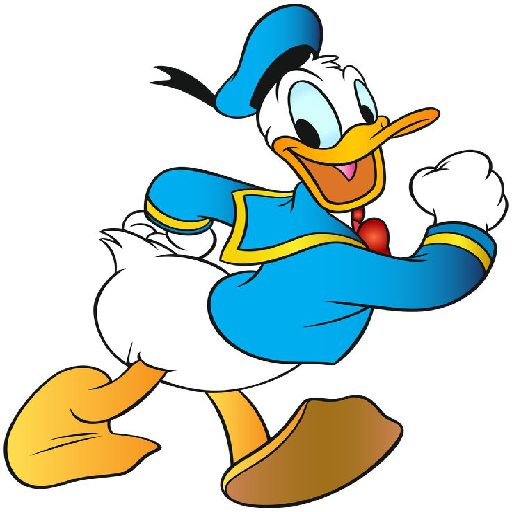

In [14]:
#My Input
img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


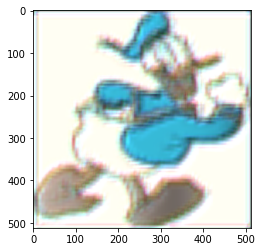

In [15]:
#View Result
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


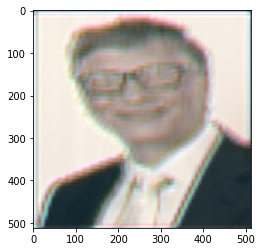

In [17]:
img = tf.keras.preprocessing.image.load_img('Bill_Gates.jpg', target_size=(SIZE, SIZE))
img_data= tf.keras.preprocessing.image.img_to_array(img)
img_array = img_data.astype('float32') / 255.
myCompatibleImage = np.expand_dims(img_array, axis = 0)
pred = model.predict(myCompatibleImage)
plt.imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

In [18]:
pred[0]

array([[[0.38560215, 0.23108342, 0.18665278],
        [0.33141568, 0.33805352, 0.22378336],
        [0.30058086, 0.34796542, 0.24970633],
        ...,
        [0.1875227 , 0.27318063, 0.20851488],
        [0.12777112, 0.24190298, 0.1520941 ],
        [0.08046857, 0.17019829, 0.11130254]],

       [[0.40620857, 0.44577175, 0.2937182 ],
        [0.44766212, 0.52690095, 0.4881119 ],
        [0.39275667, 0.5617678 , 0.5165272 ],
        ...,
        [0.28929895, 0.35852808, 0.44793406],
        [0.16105999, 0.34591156, 0.359094  ],
        [0.12086008, 0.23051578, 0.22321412]],

       [[0.45064974, 0.45842573, 0.2920997 ],
        [0.4786832 , 0.5283019 , 0.45331433],
        [0.48859742, 0.59741527, 0.49614593],
        ...,
        [0.40335938, 0.41295284, 0.4265892 ],
        [0.27370998, 0.38439852, 0.31212777],
        [0.1975044 , 0.27406573, 0.20867354]],

       ...,

       [[0.71678656, 0.7186361 , 0.58801657],
        [0.7407863 , 0.8264359 , 0.9340887 ],
        [0.8132612 , 0

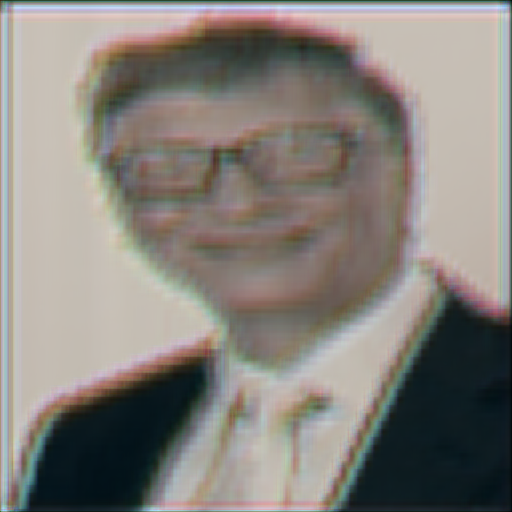

In [19]:
tf.keras.preprocessing.image.array_to_img(pred[0].reshape(SIZE,SIZE,3))

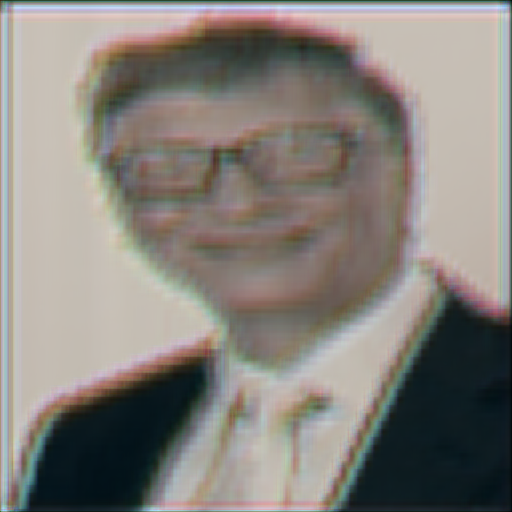

In [20]:
tf.keras.preprocessing.image.array_to_img(pred[0].reshape(SIZE,SIZE,3))